# Evaluating feature selection algorithms to apply in antimicrobial-resistant genes classification in Gram-negative bacterias.

Explore feature selection and evaluation algorithms to select the most important features of antimicrobial-resistant genes in Gram-negative bacterias.

## Imports

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("../data/Ac_Sa_Ca_Kl_Ec/bla_all.csv")

In [51]:
df.describe()

,X.G1.1.1.1.,X.G1.1.1.2.,X.G1.1.1.3.,X.G1.1.1.4.,X.G1.1.1.5.,X.G1.1.1.6.,X.G1.1.1.7.,X.G1.1.1.8.,X.G1.1.1.9.,X.G1.1.1.10.,...,LC6.1,LC6.2,LC6.3,LC7.1,LC7.2,LC7.3,LC8.1,LC8.2,LC8.3,Output
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,9.546110,0.995702,5.307196,6.349583,3.843472,7.201760,2.093861,6.229314,6.307413,9.653214,...,0.445573,0.419921,0.128796,0.535768,0.270609,0.181662,0.444602,0.399388,0.149591,-0.196262
std,3.163466,0.593482,1.464356,1.733894,1.480018,1.655267,1.029004,2.342338,2.619822,2.456389,...,0.131319,0.232507,0.138225,0.133181,0.206361,0.137771,0.135837,0.206256,0.111758,0.985166
min,1.293103,0.000000,0.947867,0.645161,0.598802,3.167421,0.000000,1.796407,1.290323,3.703704,...,0.175565,0.004273,0.000739,0.198173,0.002706,0.000444,0.164242,0.006667,0.000722,-1.000000
25%,7.404220,0.639671,4.430558,5.339520,2.921814,6.024760,1.341382,4.571979,4.525643,8.042789,...,0.357124,0.246762,0.010518,0.442243,0.079673,0.065046,0.351193,0.277176,0.064861,-1.000000
50%,9.027778,0.946372,5.161290,6.086957,3.723404,7.255521,2.068966,5.594406,5.882353,9.574468,...,0.420970,0.458000,0.095710,0.547167,0.259099,0.168071,0.438444,0.397306,0.157352,-1.000000
75%,12.152157,1.355934,6.059658,7.649781,4.663963,8.159647,2.636544,7.658243,7.694489,11.200805,...,0.546273,0.615031,0.182799,0.630778,0.420922,0.238732,0.526657,0.508162,0.204821,1.000000
max,20.000000,3.030303,10.344828,10.185185,9.090909,11.258278,5.641026,13.084112,13.122172,20.000000,...,0.754526,0.817000,0.601692,0.854167,0.805173,0.596882,0.758269,0.829848,0.438157,1.000000


## Discretizing

In [52]:
def discretize(df):
    for i in df.columns:
        if i != "Feature":
            df[i] = pd.qcut(df[i], q=5,  labels=False, precision=0, duplicates='drop')
    return df

In [53]:
df = discretize(df)

In [54]:
df.describe()

,X.G1.1.1.1.,X.G1.1.1.2.,X.G1.1.1.3.,X.G1.1.1.4.,X.G1.1.1.5.,X.G1.1.1.6.,X.G1.1.1.7.,X.G1.1.1.8.,X.G1.1.1.9.,X.G1.1.1.10.,...,LC6.1,LC6.2,LC6.3,LC7.1,LC7.2,LC7.3,LC8.1,LC8.2,LC8.3,Output
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.000000,2.000000,2.000000,2.000000,1.990654,1.990654,1.990654,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.401869
std,1.434086,1.434086,1.434086,1.434086,1.430763,1.424154,1.430763,1.434086,1.434086,1.434086,...,1.434086,1.434086,1.434086,1.434086,1.434086,1.434086,1.434086,1.434086,1.434086,0.492583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [55]:
df

,Feature,X.G1.1.1.1.,X.G1.1.1.2.,X.G1.1.1.3.,X.G1.1.1.4.,X.G1.1.1.5.,X.G1.1.1.6.,X.G1.1.1.7.,X.G1.1.1.8.,X.G1.1.1.9.,...,LC6.1,LC6.2,LC6.3,LC7.1,LC7.2,LC7.3,LC8.1,LC8.2,LC8.3,Output
0,ABQ42698,2,0,0,0,0,2,2,1,3,...,2,2,2,4,1,2,2,1,4,1
1,WP_063857785,3,1,0,0,0,3,1,0,2,...,2,2,3,3,1,2,2,1,4,1
2,AKN19343,3,1,0,0,1,3,2,1,2,...,3,2,2,2,2,3,2,1,4,1
3,CQR83532,2,4,0,0,1,3,1,1,1,...,3,1,3,2,2,3,3,1,4,1
4,WP_032492458,4,0,0,0,0,4,4,0,1,...,3,2,2,3,2,3,2,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,CDL61843,1,2,3,3,4,2,2,2,1,...,3,0,4,4,0,3,4,0,1,0
103,CDL63342,4,4,3,4,0,2,4,3,1,...,0,3,3,2,2,1,0,4,0,0
104,CDL64114,0,3,2,0,4,4,4,4,0,...,0,4,1,0,4,1,0,4,0,0
105,CDL64552,4,1,1,3,1,0,2,0,0,...,1,2,2,0,4,0,0,4,0,0


## Dividing train and test data

In [66]:
#df = pd.get_dummies(df, columns=["Feature"])
y = df["Output"]
X = df.drop(["Output","Feature"], axis=1) 

In [83]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=4)

In [85]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

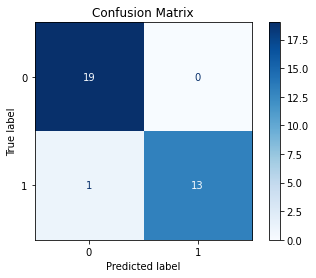

In [86]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

plt.show()

In [87]:
scores = cross_val_score(clf, X_test, y_test, cv=5, scoring='f1_macro')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.90 accuracy with a standard deviation of 0.14


In [88]:
y_pred = cross_val_predict(clf, X_test, y_test, cv=3)

In [89]:
accuracy_score(y_test, y_pred)

0.9393939393939394

In [90]:
clf.score(X_test,y_test)

0.9696969696969697